<a href="https://colab.research.google.com/github/sarvesh2000/ezfinup/blob/vaishnav/Algo_Trading_For_Dynamic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import pandas_datareader as pdr

In [2]:
def display(start,end,symbol):
    df = pdr.get_data_yahoo(symbol, start,end)
    if symbol.upper() == 'AMZN':
        df.to_csv('AMZN.csv')
    elif symbol.upper() == 'TSLA':
        df.to_csv('TSLA.csv')
    elif symbol.upper() == 'GOOG':
        df.to_csv('GOOG.csv')
    elif symbol.upper() == 'AAPL':
        df.to_csv('AAPL.csv')
    elif symbol.upper() == 'IDEA.NS':
        df.to_csv('IDEANS.csv')

    df = get_data(symbol,start,end) 

In [3]:
def get_data(symbol,start,end):
    
    #load the data
    if symbol.upper() == 'AMZN':
        df = pd.read_csv("AMZN.csv")
    elif symbol.upper() == 'TSLA':
        df = pd.read_csv("TSLA.csv")
    elif symbol.upper() == 'GOOG':
        df = pd.read_csv("GOOG.csv")  
    elif symbol.upper() == 'AAPL':
        df = pd.read_csv("AAPL.csv") 
    elif symbol.upper() == 'IDEA.NS':
        df = pd.read_csv("IDEANS.csv")

   #get the date range
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    #Set the start and end index rows both to 0
    start_row=0
    end_row=0

    #start the date from the top of the dataset and go down to see if the users start date<=date in the dataset
    for i in range(0,len(df)):
        if start <= pd.to_datetime(df['Date'][i]):
            start_row = i
            break
    #start from the bottom of the dataset and go up to see if the users end date is greater or equal to the date in the dataset\
    for j in range(0,len(df)):
        if end >= pd.to_datetime(df['Date'][len(df)-1-j]):
            end_row = len(df)-1-j
            break
    #set the index to the date
    df=df.set_index(pd.DatetimeIndex(df['Date'].values))
    
    return df.iloc[start_row:end_row+1, : ]

In [4]:
start=input()
end=input()
symbol=input()

display(start,end,symbol)

14-01-2020
14-01-2021
AAPL


In [5]:
stock = get_data(symbol,start,end)
stock

,Date,High,Low,Open,Close,Volume,Adj Close
2020-01-14,2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702
2020-01-15,2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564
2020-01-16,2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,78.135223
2020-01-17,2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,79.000244
2020-01-21,2020-01-21,79.754997,79.000000,79.297501,79.142502,110843200.0,78.464882
...,...,...,...,...,...,...,...
2021-01-07,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.919998
2021-01-08,2021-01-08,132.630005,130.229996,132.429993,132.050003,104965400.0,132.050003
2021-01-11,2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
2021-01-12,2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003


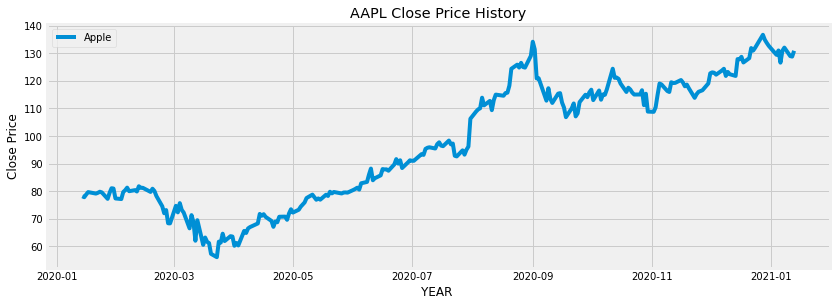

In [6]:


#Visualize the Data
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple')
plt.title(symbol+' Close Price History')
plt.xlabel('YEAR ')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [7]:
Sma30=pd.DataFrame()
Sma30['Prev Close Price']=stock['Close'].rolling(window=10).mean()

#Creating Simple Moving Average with 100-day Window
Sma100=pd.DataFrame()
Sma100['Prev Close Price']=stock['Close'].rolling(window=50).mean()

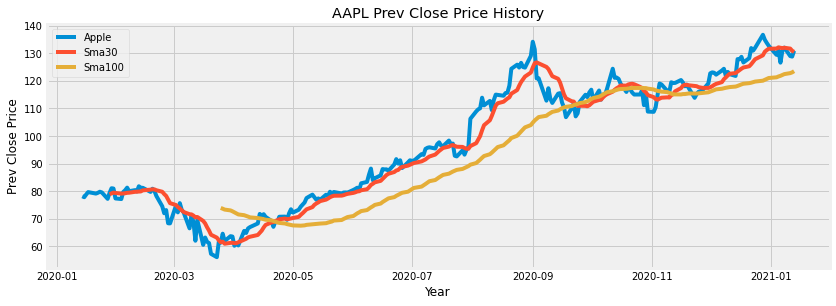

In [8]:
#Visualize to compare
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple')
plt.plot(Sma30['Prev Close Price'],label = 'Sma30')
plt.plot(Sma100['Prev Close Price'],label = 'Sma100')
plt.title(symbol+' Prev Close Price History')
plt.xlabel('Year')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()


In [9]:
data=pd.DataFrame()
data['stock']=stock['Close']
data['Sma30']=Sma30['Prev Close Price']
data['Sma100']=Sma100['Prev Close Price']

In [10]:
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1


  for i in range(len(data)):
    if data['Sma30'][i]>data['Sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['Sma30'][i]<data['Sma100'][i]:
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)


  return(sigPriceBuy,sigPriceSell)

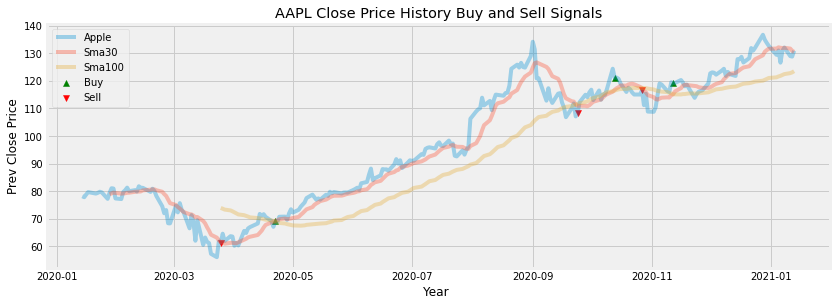

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

In [11]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

#Visualize the Data
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple',alpha=0.35)
plt.plot(Sma30['Prev Close Price'],label = 'Sma30' ,alpha=0.35)
plt.plot(Sma100['Prev Close Price'],label = 'Sma100' ,alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title(symbol+' Close Price History Buy and Sell Signals')
plt.xlabel('Year ')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()
plt.savefig('static/images/Algo_Trading.png')